In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
#matplotlib.rc('axes', unicode_minus = False)
matplotlib.rc('font', family = 'Malgun Gothic')

In [4]:
# 데이터 불러오기
df = pd.read_csv("000_Card_Spending.csv", parse_dates = ["사용일자"])
df.head()

df.loc[df["소비처"] == "창신2동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계2동", "지역"] = "노원구"
df.loc[df["소비처"] == "중계4동", "지역"] = "노원구"
df.loc[df["소비처"] == "평창동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계6,7동", "지역"] = "노원구"
df.loc[df["소비처"] == "청운효자동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계10동", "지역"] = "노원구"
df.loc[df["소비처"] == "종로5,6가동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계9동", "지역"] = "노원구"
df.loc[df["소비처"] == "공릉2동", "지역"] = "노원구"
df.loc[df["소비처"] == "공릉1동", "지역"] = "노원구"
df.loc[df["소비처"] == "상계5동", "지역"] = "노원구"
df.loc[df["소비처"] == "하계1동", "지역"] = "노원구"
df.loc[df["소비처"] == "사직동", "지역"] = "종로구"
df.loc[df["소비처"] == "교남동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계8동", "지역"] = "노원구"
df.loc[df["소비처"] == "혜화동", "지역"] = "종로구"
df.loc[df["소비처"] == "부암동", "지역"] = "종로구"
df.loc[df["소비처"] == "하계2동", "지역"] = "노원구"

df.loc[df["소비처"] == "중계2,3동", "지역"] = "노원구"
df.loc[df["소비처"] == "삼청동", "지역"] = "종로구"
df.loc[df["소비처"] == "창신3동", "지역"] = "종로구"
df.loc[df["소비처"] == "중계1동", "지역"] = "노원구"
df.loc[df["소비처"] == "무악동", "지역"] = "종로구"
df.loc[df["소비처"] == "상계3,4동", "지역"] = "노원구"
df.loc[df["소비처"] == "중계본동", "지역"] = "노원구"
df.loc[df["소비처"] == "종로1,2,3,4가동", "지역"] = "종로구"
df["주소"] = df["지역"] + " " + df["소비처"]

In [5]:
idx = df[df['사용횟수']<= 0].index
df = df.drop(idx)

In [6]:
idx = df[df['사용횟수']<= 0].index
df = df.drop(idx)

idx = df[df["사용횟수"]> 3*287.457857].index
df = df.drop(idx)
df.shape #187442에서 2551개 제거

idx = df[df['연령'] >= 100].index
df.drop(idx,inplace=True)

idx = df[df["사용금액"]> 3*10934.29].index
df = df.drop(idx)
df.shape #184891에서 461개 제거

(184427, 10)

In [7]:
idx = df[df["사용금액"]> 3*10934.29].index
df = df.drop(idx)
df.shape #184891에서 461개 제거

(184427, 10)

In [8]:
df.head()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82
1,2018-04-01,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61
2,2018-04-01,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140
3,2018-04-01,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104
4,2018-04-01,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,57,103


In [9]:
df_card = pd.read_csv('Card_Data_1(20210904_220136).csv', encoding='cp949')
df_card.rename(columns={'Card_ID' : '사용카드'}, inplace=True)
df = pd.merge(df, df_card, on = '사용카드')

In [11]:
df.drop(['Unnamed: 0', '소개', '연회비', '옵션', '카드명', '가족카드여부'], axis=1, inplace=True)
df.head()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,분류,혜택분야
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,체크카드,public
1,2018-04-21,종로구,창신3동,종로구 창신3동,의료기관,남성,42,38,129,82,체크카드,public
2,2018-04-24,종로구,혜화동,종로구 혜화동,자동차정비,여성,67,2,57,82,체크카드,public
3,2018-05-02,종로구,"종로5,6가동","종로구 종로5,6가동",음료식품,여성,35,3,53,82,체크카드,public
4,2018-05-04,노원구,상계8동,노원구 상계8동,서적문구,여성,77,29,6,82,체크카드,public


In [ ]:
b_pay = pd.pivot_table(data=df, index='혜택분야', values='사용금액')

In [2]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
df['연령대'] = pd.cut(df['연령'], bins=bins, labels = ['10대 미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대','90대'])
sns.set_palette('pastel')
sns.countplot(data=df, x = '연령대')

NameError: name 'pd' is not defined

In [39]:
age_p = pd.pivot_table(data=df, index = ['연령대','사용카드'],values='사용횟수', aggfunc='count').reset_index().sort_values(by=['연령대','사용횟수'], ascending=False)

age_p.head(30)

,연령대,사용카드,사용횟수
2074,90대,154,56
2053,90대,133,48
2054,90대,134,46
2131,90대,212,42
2076,90대,156,31
2052,90대,132,23
2133,90대,214,22
2055,90대,135,21
2132,90대,213,20
2093,90대,173,19


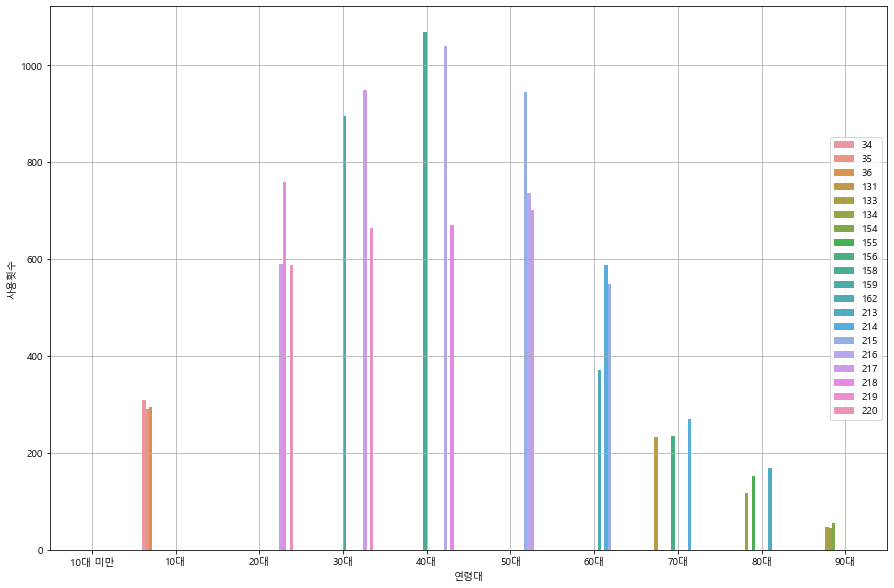

In [40]:
age_p_g = age_p.groupby('연령대').apply(lambda x : x[:3])
plt.figure(figsize=(15,10))
sns.barplot(data=age_p_g, x='연령대', y='사용횟수', hue='사용카드')
plt.legend(loc='center right')
plt.grid()

In [42]:
age_p_g

연령대  사용카드  사용횟수
연령대                      
10대 34    10대    34   309
    36    10대    36   295
    35    10대    35   291
20대 465   20대   218   759
    464   20대   217   590
    467   20대   220   588
30대 727   30대   217   950
    669   30대   159   895
    729   30대   219   665
40대 931   40대   158  1068
    989   40대   216  1039
    991   40대   218   670
50대 1251  50대   215   945
    1252  50대   216   737
    1253  50대   217   702
60대 1513  60대   214   588
    1514  60대   215   549
    1461  60대   162   372
70대 1757  70대   214   270
    1699  70대   156   236
    1674  70대   131   234
80대 1967  80대   213   169
    1909  80대   155   152
    1888  80대   134   117
90대 2074  90대   154    56
    2053  90대   133    48
    2054  90대   134    46

In [41]:
age_p_g.to_csv('age_card.csv', index=False, encoding='cp949')